In [ ]:
!pip install kaggle torch torchvision numpy matplotlib opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
from google.colab import files

# Upload kaggle.json manually
files.upload()


KeyboardInterrupt: 

In [ ]:
import os

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!mv kaggle.json ~/.kaggle/


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

Dataset URL: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection
License(s): copyright-authors
 60% 9.00M/15.1M [00:00<00:00, 91.8MB/s]
100% 15.1M/15.1M [00:00<00:00, 71.9MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("brain-mri-images-for-brain-tumor-detection.zip", 'r') as zip_ref:
    zip_ref.extractall("brain_mri_dataset")

print("Dataset downloaded and extracted successfully!")

Dataset downloaded and extracted successfully!


In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

In [ ]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize([0.5], [0.5])  # Normalize to [-1,1] for GAN stability
])

In [ ]:
dataset_path = "/content/brain_mri_dataset"
dataset = ImageFolder(root=dataset_path, transform=transform)

# Create DataLoader
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Print dataset info
print(f"Classes: {dataset.classes}")  # Should output ['no', 'yes']
print(f"Total images in Training set: {len(dataset)}")

Classes: ['brain_tumor_dataset', 'no', 'yes']
Total images in Training set: 506


In [ ]:
# Check class mapping
print(dataset.class_to_idx)  # Output: {'no': 0, 'yes': 1}


{'brain_tumor_dataset': 0, 'no': 1, 'yes': 2}


In [ ]:
import os
import shutil
import random

# Define dataset paths
dataset_path = "brain_mri_dataset"  # The folder that contains 'yes' and 'no'
train_path = os.path.join(dataset_path, "Training")
test_path = os.path.join(dataset_path, "Testing")

# Create Training and Testing directories
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Create 'yes' and 'no' subfolders inside Training and Testing
for category in ["yes", "no"]:
    os.makedirs(os.path.join(train_path, category), exist_ok=True)
    os.makedirs(os.path.join(test_path, category), exist_ok=True)

print("✅ Training & Testing folders created!")


✅ Training & Testing folders created!


In [ ]:
# Train-test split ratio
split_ratio = 0.8

# Move images into Training and Testing folders
for category in ["yes", "no"]:
    original_folder = os.path.join(dataset_path, category)  # Original folder with images
    images = os.listdir(original_folder)  # List of images

    random.shuffle(images)  # Shuffle for randomness

    split_index = int(len(images) * split_ratio)  # Compute split index
    train_images = images[:split_index]  # First 80% for training
    test_images = images[split_index:]   # Last 20% for testing

    # Move images to the new Training and Testing folders
    for img in train_images:
        shutil.move(os.path.join(original_folder, img), os.path.join(train_path, category, img))

    for img in test_images:
        shutil.move(os.path.join(original_folder, img), os.path.join(test_path, category, img))

    # Remove empty original category folder
    os.rmdir(original_folder)

print("✅ Dataset successfully split into Training and Testing sets!")


✅ Dataset successfully split into Training and Testing sets!


In [ ]:
import torch
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

# Define transformations for preprocessing
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize([0.5], [0.5])  # Normalize between [-1,1]
])

# Load the dataset
dataset_path = "brain_mri_dataset/Training"
dataset = ImageFolder(root=dataset_path, transform=transform)

# Create a DataLoader
batch_size = 32  # Adjust based on GPU memory
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Check dataset classes
print("Class Mapping:", dataset.class_to_idx)  # Expected output: {'no': 0, 'yes': 1}
print(f"Total images in Training set: {len(dataset)}")


Class Mapping: {'no': 0, 'yes': 1}
Total images in Training set: 202


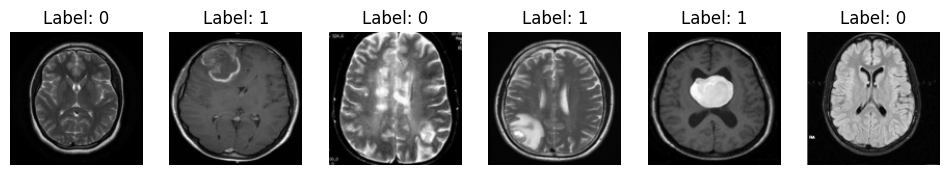

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images
dataiter = iter(dataloader)
images, labels = next(dataiter)

# Function to show images
def show_images(images, labels, num=6):
    fig, axes = plt.subplots(1, num, figsize=(12, 6))
    for i in range(num):
        img = images[i].squeeze().numpy()  # Convert tensor to NumPy
        label = labels[i].item()
        axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f"Label: {label}")
        axes[i].axis('off')

# Show sample images
show_images(images, labels)


In [ ]:
import torch.nn as nn

class Generator(nn.Module):
    def __init__(self, latent_dim, num_classes, img_shape):
        super(Generator, self).__init__()
        self.label_embedding = nn.Embedding(num_classes, latent_dim)  # Embed labels

        self.model = nn.Sequential(
            nn.Linear(latent_dim * 2, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, int(np.prod(img_shape))),
            nn.Tanh()  # Output range [-1,1] (same as dataset normalization)
        )

        self.img_shape = img_shape

    def forward(self, z, labels):
        label_embed = self.label_embedding(labels)  # Convert labels into vectors
        gen_input = torch.cat((z, label_embed), dim=1)  # Concatenate noise + label
        img = self.model(gen_input)
        img = img.view(img.size(0), *self.img_shape)  # Reshape to image format
        return img


In [ ]:
class Discriminator(nn.Module):
    def __init__(self, num_classes, img_shape):
        super(Discriminator, self).__init__()
        self.label_embedding = nn.Embedding(num_classes, int(np.prod(img_shape)))  # Embed labels

        self.model = nn.Sequential(
            nn.Linear(int(np.prod(img_shape)) * 2, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid()  # Output probability
        )

    def forward(self, img, labels):
        label_embed = self.label_embedding(labels)  # Convert labels into vectors
        d_input = torch.cat((img.view(img.size(0), -1), label_embed), dim=1)  # Concatenate
        validity = self.model(d_input)
        return validity


In [ ]:
import torch.optim as optim

# Set device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define model parameters
latent_dim = 100  # Size of noise vector
num_classes = 2  # 'no' = 0, 'yes' = 1
img_shape = (1, 128, 128)  # Grayscale MRI image shape

# Initialize models
generator = Generator(latent_dim, num_classes, img_shape).to(device)
discriminator = Discriminator(num_classes, img_shape).to(device)

# Loss function
adversarial_loss = nn.BCELoss()

# Optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Training loop
num_epochs = 100  # Adjust based on your dataset
for epoch in range(num_epochs):
    for i, (real_images, labels) in enumerate(dataloader):

        batch_size = real_images.size(0)
        real_images, labels = real_images.to(device), labels.to(device)

        # Real and fake labels
        real = torch.ones(batch_size, 1).to(device)
        fake = torch.zeros(batch_size, 1).to(device)

        # Train Generator
        optimizer_G.zero_grad()
        z = torch.randn(batch_size, latent_dim).to(device)
        gen_labels = torch.randint(0, num_classes, (batch_size,)).to(device)
        generated_images = generator(z, gen_labels)
        g_loss = adversarial_loss(discriminator(generated_images, gen_labels), real)
        g_loss.backward()
        optimizer_G.step()

        # Train Discriminator
        optimizer_D.zero_grad()
        real_loss = adversarial_loss(discriminator(real_images, labels), real)
        fake_loss = adversarial_loss(discriminator(generated_images.detach(), gen_labels), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

    print(f"Epoch [{epoch}/{num_epochs}] - D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")


Epoch [0/100] - D Loss: 0.2072, G Loss: 3.1807
Epoch [1/100] - D Loss: 0.6217, G Loss: 0.5593
Epoch [2/100] - D Loss: 0.4757, G Loss: 0.5887
Epoch [3/100] - D Loss: 0.5615, G Loss: 0.9702
Epoch [4/100] - D Loss: 0.2112, G Loss: 1.5386
Epoch [5/100] - D Loss: 0.6469, G Loss: 1.5744
Epoch [6/100] - D Loss: 0.5088, G Loss: 1.6469
Epoch [7/100] - D Loss: 0.3289, G Loss: 2.3893
Epoch [8/100] - D Loss: 0.5772, G Loss: 0.6745
Epoch [9/100] - D Loss: 0.8025, G Loss: 0.8657
Epoch [10/100] - D Loss: 0.4625, G Loss: 1.0656
Epoch [11/100] - D Loss: 0.4620, G Loss: 1.1533
Epoch [12/100] - D Loss: 0.4860, G Loss: 1.0842
Epoch [13/100] - D Loss: 0.6120, G Loss: 0.5024
Epoch [14/100] - D Loss: 0.2784, G Loss: 1.9693
Epoch [15/100] - D Loss: 0.5568, G Loss: 2.7393
Epoch [16/100] - D Loss: 0.0960, G Loss: 3.8180
Epoch [17/100] - D Loss: 0.4498, G Loss: 0.6988
Epoch [18/100] - D Loss: 0.4566, G Loss: 1.4412
Epoch [19/100] - D Loss: 0.9081, G Loss: 1.1370
Epoch [20/100] - D Loss: 0.2237, G Loss: 1.7163
Ep

In [ ]:
import torch
import os

# Create a directory to save models
os.makedirs("saved_models1", exist_ok=True)

# Training loop with model saving
num_epochs = 250  # Train for more epochs
save_interval = 50  # Save model every 10 epochs

for epoch in range(num_epochs):
    for i, (real_images, labels) in enumerate(dataloader):

        batch_size = real_images.size(0)
        real_images, labels = real_images.to(device), labels.to(device)

        # Real and fake labels
        real = torch.ones(batch_size, 1).to(device)
        fake = torch.zeros(batch_size, 1).to(device)

        # Train Generator
        optimizer_G.zero_grad()
        z = torch.randn(batch_size, latent_dim).to(device)
        gen_labels = torch.randint(0, num_classes, (batch_size,)).to(device)
        generated_images = generator(z, gen_labels)
        g_loss = adversarial_loss(discriminator(generated_images, gen_labels), real)
        g_loss.backward()
        optimizer_G.step()

        # Train Discriminator
        optimizer_D.zero_grad()
        real_loss = adversarial_loss(discriminator(real_images, labels), real)
        fake_loss = adversarial_loss(discriminator(generated_images.detach(), gen_labels), fake)
        d_loss = (real_loss + fake_loss) / 2
        d_loss.backward()
        optimizer_D.step()

    print(f"Epoch [{epoch+1}/{num_epochs}] - D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

    # Save the model every 10 epochs
    if (epoch + 1) % save_interval == 0:
        torch.save(generator.state_dict(), f"saved_models/generator_epoch_{epoch+1}.pth")
        torch.save(discriminator.state_dict(), f"saved_models/discriminator_epoch_{epoch+1}.pth")
        print(f"✅ Models saved at epoch {epoch+1}!")


Epoch [1/250] - D Loss: 0.2303, G Loss: 3.6617
Epoch [2/250] - D Loss: 0.3280, G Loss: 1.9955
Epoch [3/250] - D Loss: 0.2518, G Loss: 4.7675
Epoch [4/250] - D Loss: 0.5418, G Loss: 0.9311
Epoch [5/250] - D Loss: 0.2999, G Loss: 8.7078
Epoch [6/250] - D Loss: 0.1474, G Loss: 3.5159
Epoch [7/250] - D Loss: 0.4073, G Loss: 1.7155
Epoch [8/250] - D Loss: 0.0896, G Loss: 2.3394
Epoch [9/250] - D Loss: 0.1374, G Loss: 3.1923
Epoch [10/250] - D Loss: 0.0847, G Loss: 2.7468
Epoch [11/250] - D Loss: 0.1849, G Loss: 2.5245
Epoch [12/250] - D Loss: 0.1475, G Loss: 2.1961
Epoch [13/250] - D Loss: 0.1914, G Loss: 3.4876
Epoch [14/250] - D Loss: 0.0342, G Loss: 4.4861
Epoch [15/250] - D Loss: 0.0702, G Loss: 3.0375
Epoch [16/250] - D Loss: 0.1766, G Loss: 1.9202
Epoch [17/250] - D Loss: 0.1239, G Loss: 2.8126
Epoch [18/250] - D Loss: 0.0622, G Loss: 3.5787
Epoch [19/250] - D Loss: 0.0276, G Loss: 4.3577
Epoch [20/250] - D Loss: 0.1604, G Loss: 2.4678
Epoch [21/250] - D Loss: 0.0717, G Loss: 6.4944
E

<ipython-input-46-3839d4b8a25b>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator.load_state_dict(torch.load("saved_models/generator_epoch_100.pth", map_location=de

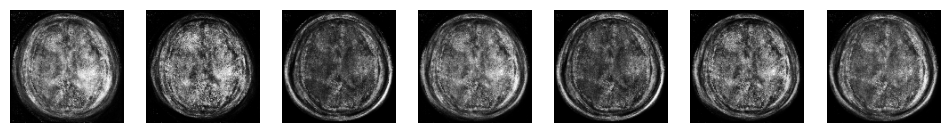

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load trained Generator (adjust the filename based on saved model)
generator.load_state_dict(torch.load("saved_models/generator_epoch_100.pth", map_location=device))
generator.eval()

# Function to generate and visualize images
def generate_images(num_samples=6, label=1):  # Label: 1 (Tumor), 0 (No Tumor)
    z = torch.randn(num_samples, latent_dim).to(device)  # Random noise
    labels = torch.full((num_samples,), label, dtype=torch.long).to(device)  # All same class
    with torch.no_grad():
        generated_images = generator(z, labels)

    # Convert images from [-1,1] range to [0,1] for visualization
    generated_images = (generated_images + 1) / 2

    fig, axes = plt.subplots(1, num_samples, figsize=(12, 6))
    for i in range(num_samples):
        img = generated_images[i].squeeze().cpu().numpy()  # Convert tensor to NumPy
        axes[i].imshow(img, cmap='gray')
        axes[i].axis('off')
    plt.show()

# Generate 6 tumor images
generate_images(num_samples=7, label=1)
